## ```NoteBook Focus```
---
1. More modeling to figure out why the UNbalanced classes model is performing so well.

2. 

## ```Imports```
---

In [10]:
import pandas as pd
from classifiers_copy import classify
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## ```Modeling after EDA1```
---
1. I'm going to try a model on UNbalanced classes with less features to see how the model performs. I'm expecting for they're to be a drop in performance.

In [3]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [4]:
drugs['prisdum'].value_counts(normalize=True)

# 0 = no prison time
# 1 = prison time

1    0.955196
0    0.044804
Name: prisdum, dtype: float64

In [5]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'educatn', 'intdum', 'methmin', 'monrace', 'monsex', 'mweight',
       'newcit', 'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen',
       'offguide', 'prisdum', 'probatn', 'probdum', 'quarter', 'reas1',
       'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
       'safety', 'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1',
       'sources', 'statmax', 'statmin', 'supermax', 'supermin', 'suprdum',
       'suprel', 'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
       'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor',
       'xminsor', 'sentrnge'],
      dtype='object')

In [34]:
# model with UN_balanced classes

#set up X/y
X = drugs[['age','drugmin','educatn','neweduc','quarter','sources',
#            'statmax', 'statmin', 'supermax', 'supermin','suprel','timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
           'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
           'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor'
          ]]
y = drugs['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# train multiple models
unbalanced_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [35]:
unbalanced_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.964941,0.956625,0.008316,0.981906,0.977587,0.004319,0.968288,0.965238,0.003050,0.995912,0.990255,0.005657
logreg,0.958829,0.956229,0.002600,0.978866,0.977561,0.001305,0.960246,0.957819,0.002427,0.998223,0.998134,0.000089
dt,0.999830,0.942563,0.057267,0.999911,0.970299,0.029612,1.000000,0.958713,0.041287,0.999822,0.982169,0.017653
bag,0.996859,0.955239,0.041620,0.998356,0.976939,0.021418,0.998046,0.961824,0.036222,0.998667,0.992536,0.006131
bag_knn,0.965195,0.956823,0.008372,0.982032,0.977710,0.004322,0.968701,0.964495,0.004207,0.995734,0.991292,0.004442
bag_log,0.958744,0.956229,0.002515,0.978822,0.977557,0.001265,0.960243,0.958002,0.002241,0.998134,0.997927,0.000207
rf,0.999830,0.956427,0.043403,0.999911,0.977701,0.022210,1.000000,0.956375,0.043625,0.999822,1.000000,0.000178
et,0.999830,0.955635,0.044195,0.999911,0.977250,0.022661,1.000000,0.957794,0.042206,0.999822,0.997512,0.002310
ada,0.956791,0.955239,0.001553,0.977712,0.977107,0.000605,0.963660,0.955239,0.008421,0.992179,1.000000,0.007821
gboost,0.966638,0.956031,0.010607,0.982738,0.977494,0.005244,0.971515,0.956358,0.015158,0.994223,0.999585,0.005362


train acc: 0.9588285229202037
test acc: 0.9562289562289562


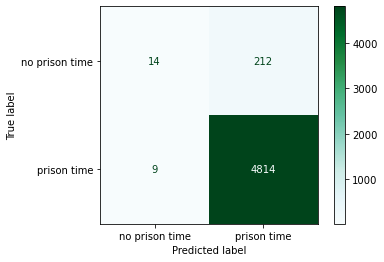

In [36]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate, train, evaluate
logreg = LogisticRegression()
logreg.fit(X_train_ss,y_train)
print(f"train acc: {logreg.score(X_train_ss,y_train)}")
print(f"test acc: {logreg.score(X_test_ss,y_test)}")

# create df to visualize coefs
logreg_scores = pd.DataFrame(columns=X.columns,data=logreg.coef_).T

# set up confusion matrix
cm = confusion_matrix(y_test,logreg.predict(X_test_ss))

# plot matrix
plot_confusion_matrix(logreg, X_test_ss, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time']);

**The model is performing well like we expected, misclassifying the minority class with frequency. More EDA and going through the data dictionary are my next steps in EDA2.**